### 로지스틱 회귀 모델 구현 - 분류

In [158]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [159]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv')
df

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [160]:
df.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [161]:
# 분류하는 형태 7가지
df['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [162]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [163]:
# str문자 타입 존재
# - 제거를 나중에 타입을 df 합칠지
# - 원핫인코딩으로 만들어서 머신러닝 돌릴지 판단

In [164]:
# pandas 원핫인코딩 함수
df_dumm = pd.get_dummies(df['Species'])
df_dumm.head(36)

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False
2,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False
5,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False
7,True,False,False,False,False,False,False
8,True,False,False,False,False,False,False
9,True,False,False,False,False,False,False


In [165]:
df['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [166]:
# 컬럼에 문자타입 존재하는지 확인
# 머신러닝을 돌릴수가 없음.
# 문자 - 삭제
# 문자 - 코드 변경
# - 1. 문자 아스키코드 변경 - 표준점수
# - 2. 원핫인코딩 방식

# object(str) - result,target 문자올수 있음.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [168]:
# 데이터 전처리 - data,result 분리
# 데이터 전처리 - train,test 분리
# 데이터 전처리 - 표준화 작업
# 데이터 학습시키기
# 데이터 정답률

# 데이터 전처리
# 다시 학습시키기

판다스 전처리 - data,result 분리, 표준화작업

In [169]:
# # 데이터 전처리 - data,result 분리
# df_target = df['Species']
# df_input = df.iloc[:,1:]

In [170]:
# # 데이터 전처리 - train,test 분리
# from sklearn.model_selection import train_test_split
# train_input,test_input,train_target,test_target = train_test_split(
#     df_input,df_target,random_state=42
# )

In [171]:
# 데이터 전처리 - data,result 분리
d_target = df['Species'].to_numpy()
d_input = df.iloc[:,1:].to_numpy()

In [172]:
# 데이터 전처리 - train,test 분리
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    d_input,d_target,random_state=42
)

In [173]:
# 데이터 전처리 - 표준화 작업
# 타입이 numpy
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### 전처리 완성

In [174]:
# 데이터 학습시키기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

LogisticRegression()

In [175]:
# 정답률 확인 - 과소적합
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8067226890756303
0.85


In [176]:
### 반복횟수를 늘려서 정답률 높이는 작업
lr = LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)


LogisticRegression(C=20, max_iter=1000)

In [177]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [178]:
# 로지스틱 회귀 분류 모델을 완성

In [179]:
# 경사하강법 - 머신러닝 튜닝, 기존에 훈련된 모델에서 다시 훈련
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

sc.fit(train_scaled,train_target)

/opt/homebrew/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log_loss', max_iter=10, random_state=42)

In [180]:
# train_target

In [181]:
# 경사하강법 sc사용
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.8


In [182]:
classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [183]:
# 데이터 일부를 가져와서 훈련을 해서 target 맞추는데, 일부만 가져와서 전체적인 target을 알지 못함
# 전체적인 target 무엇인지 알려줘야함
sc.partial_fit(train_scaled,train_target,classes=classes)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8067226890756303
0.8


In [184]:
# partial_fit 반복을 시키면 효율이 좋아짐.
train_score = []
test_score = []
for _ in range(0,300):
    sc.partial_fit(train_scaled,train_target,classes=classes)
    train_score.append(sc.score(train_scaled,train_target))
    test_score.append(sc.score(test_scaled,test_target))

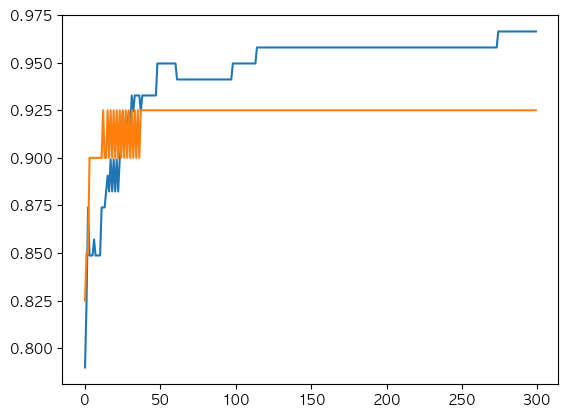

In [185]:
plt.plot(train_score)
plt.plot(test_score)

In [186]:
sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42) # 반복횟수 100번 멈춤
sc.fit(train_scaled,train_target)

print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925
